<a href="https://colab.research.google.com/github/Shubh23104/Encryptix/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
columns = [ 'Movie Name' , 'Genre' , 'Description']
column = ['Movie Name' , 'Description']

In [4]:
df_train = pd.read_csv('train_data.txt' , delimiter=':::' , engine='python' , names=columns , index_col=0 )
df_train.head()

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
df_test = pd.read_csv('test_data_solution.txt', delimiter=':::' , engine='python' , names=columns , index_col=0 )
df_test.head()

,Movie Name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [5]:
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()

In [6]:
df_train.drop(columns=['Movie Name'], inplace = True)
df_test.drop(columns=['Movie Name'], inplace = True)

In [7]:
df_train.head()

,Genre,Description
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...


In [8]:
df_test.head()

,Genre,Description
1,thriller,"l.r. brane loves his life - his car, his apar..."
2,comedy,"spain, march 1964: quico is a very naughty ch..."
3,documentary,one year in the life of albin and his family ...
4,drama,"his father has died, he hasn't spoken with hi..."
5,drama,before he was known internationally as a mart...


In [9]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6311 entries, 1 to 6311
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        6311 non-null   object
 1   Description  6311 non-null   object
dtypes: object(2)
memory usage: 147.9+ KB
None


In [10]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8055 entries, 1 to 8055
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        8055 non-null   object
 1   Description  8055 non-null   object
dtypes: object(2)
memory usage: 188.8+ KB
None


In [11]:
print(df_train.shape)

(6311, 2)


In [12]:
print(df_test.shape)

(8055, 2)


In [13]:
print("TRAINING DUPLICATES:", df_train.duplicated().sum())

TRAINING DUPLICATES: 2


In [14]:
print("TEST DUPLICATES:", df_test.duplicated().sum())

TEST DUPLICATES: 5


In [15]:
df_train = df_train.drop_duplicates(keep ='first')
df_test = df_test.drop_duplicates(keep = 'first')

In [16]:
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [17]:
print(df_train.shape)
print(df_test.shape)

(6309, 2)
(8050, 2)


In [18]:
x_train_full = df_train['Description']
y_train_full = df_train['Genre']

x_test = df_test['Description']
y_test = df_test['Genre']

In [19]:
print(x_train_full.shape)
print(y_train_full.shape)

(6309,)
(6309,)


In [20]:
print(x_test.shape)
print(y_test.shape)

(8050,)
(8050,)


<ipython-input-21-e6fee1ba37b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')


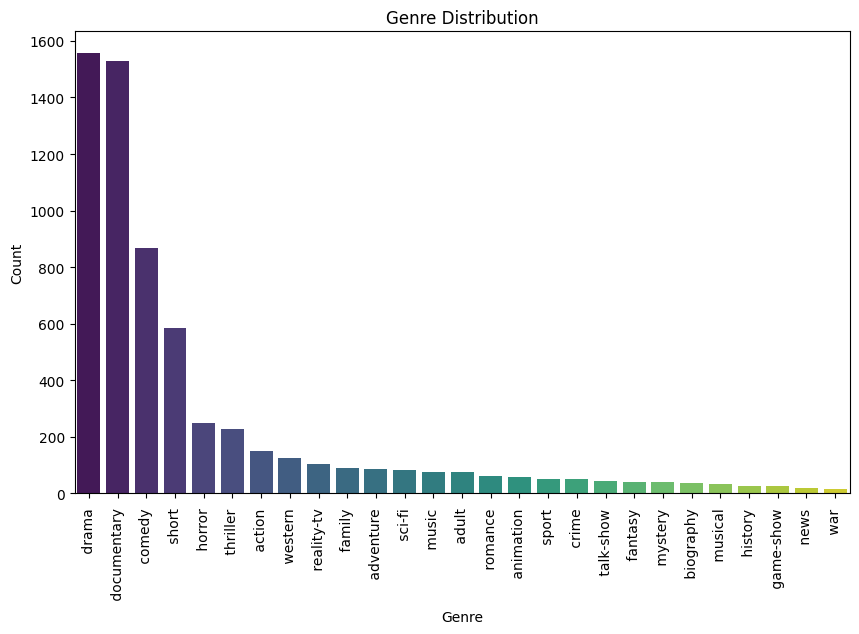

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

In [23]:
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)

print('\n')

print(Y_train.shape)
print(Y_val.shape)
print(y_test.shape)

(5047,)
(1262,)
(8050,)


(5047,)
(1262,)
(8050,)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

***Naive Bayes***

In [25]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, Y_train)

MultinomialNB()

In [26]:
y_pred_val = nb.predict(X_val_vec)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.4532488114104596
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        32
       adult        0.00      0.00      0.00        20
   adventure        0.00      0.00      0.00        16
   animation        0.00      0.00      0.00        11
   biography        0.00      0.00      0.00         4
      comedy        0.68      0.16      0.26       187
       crime        0.00      0.00      0.00        11
 documentary        0.56      0.89      0.68       314
       drama        0.37      0.85      0.51       310
      family        0.00      0.00      0.00        19
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         3
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        41
       music        0.00      0.00      0.00        13
     musical        0.00      0.00      0.00 

In [28]:
y_pred_test = nb.predict(X_test_vec)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.4537888198757764
Test Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       201
       adult        0.00      0.00      0.00        85
   adventure        0.00      0.00      0.00       101
   animation        0.00      0.00      0.00        91
   biography        0.00      0.00      0.00        38
      comedy        0.55      0.15      0.24      1097
       crime        0.00      0.00      0.00        56
 documentary        0.53      0.87      0.66      1942
       drama        0.39      0.86      0.54      2070
      family        0.00      0.00      0.00       126
     fantasy        0.00      0.00      0.00        41
   game-show        0.00      0.00      0.00        27
     history        0.00      0.00      0.00        37
      horror        0.00      0.00      0.00       329
       music        0.00      0.00      0.00       117
     musical        0.00      0.00      0.00        32
 

***Logistic Regression***

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_vec, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred_val = lr.predict(X_val_vec)

In [31]:
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5055467511885895
Validation Classification Report:
               precision    recall  f1-score   support

      action        1.00      0.03      0.06        32
       adult        0.00      0.00      0.00        20
   adventure        0.00      0.00      0.00        16
   animation        0.00      0.00      0.00        11
   biography        0.00      0.00      0.00         4
      comedy        0.51      0.42      0.46       187
       crime        0.00      0.00      0.00        11
 documentary        0.58      0.89      0.71       314
       drama        0.44      0.82      0.57       310
      family        0.00      0.00      0.00        19
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         3
     history        0.00      0.00      0.00         3
      horror        0.82      0.22      0.35        41
       music        0.00      0.00      0.00        13
     musical        0.00      0.00      0.00 

In [32]:
y_pred_test = lr.predict(X_test_vec)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.49465838509316773
Test Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       201
       adult        0.00      0.00      0.00        85
   adventure        0.00      0.00      0.00       101
   animation        0.00      0.00      0.00        91
   biography        0.00      0.00      0.00        38
      comedy        0.45      0.40      0.43      1097
       crime        0.00      0.00      0.00        56
 documentary        0.55      0.87      0.67      1942
       drama        0.45      0.80      0.58      2070
      family        0.00      0.00      0.00       126
     fantasy        0.00      0.00      0.00        41
   game-show        1.00      0.04      0.07        27
     history        0.00      0.00      0.00        37
      horror        0.81      0.20      0.32       329
       music        1.00      0.01      0.02       117
     musical        0.00      0.00      0.00        32
